In [ ]:
!pip3 install visualkeras

     |████████████████████████████████| 992 kB 44.9 MB/s 


In [5]:
from google.colab import drive 
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
 
drive.mount('/content/gdrive') 
 

Mounted at /content/gdrive


In [6]:
!unzip "/content/gdrive/My Drive/datasets/earth_data.zip" -d "./" 

Archive:  /content/gdrive/My Drive/datasets/earth_data.zip
  inflating: ./earth_data.h5         


In [7]:
from locale import normalize
import visualkeras

def loaddataH5(): 
    with h5py.File('./earth_data.h5','r') as hf: 
        trainX = np.array(hf.get('trainX'))/255.0
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))/255.0
        valY = np.array(hf.get('valY'))
        print( "Shape of training features ", trainX.shape)
        print( "Shape of test features ", valX.shape) 
        print ("Shape of training labels ", trainY.shape)
        print ("Shape of testing labels ", valY.shape)
    return trainX, trainY, valX, valY
trainX, trainY, testX, testY = loaddataH5()

Shape of training features  (19200, 64, 64, 3)
Shape of test features  (4800, 64, 64, 3)
Shape of training labels  (19200,)
Shape of testing labels  (4800,)


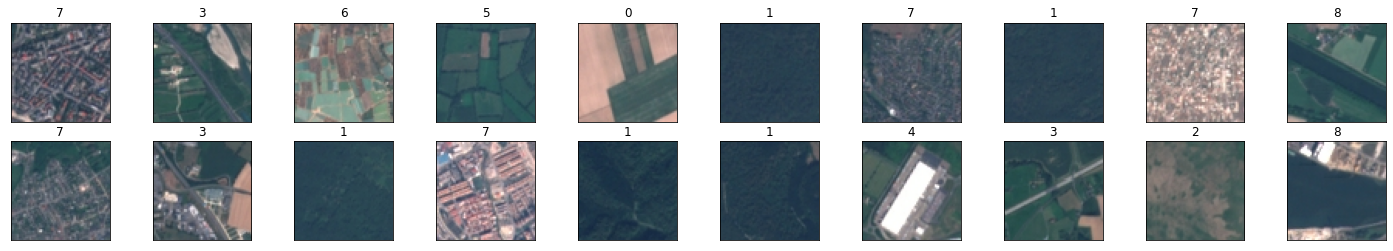

In [ ]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    img = trainX[idx]
    plt.imshow(img)
    ax.set_title(trainY[idx])

In [8]:
def plot(H):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(H.history["loss"], label="train_loss")
  plt.plot(H.history["val_loss"], label="val_loss")
  plt.plot(H.history["accuracy"], label="train_acc")
  plt.plot(H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

In [9]:


def baseline(width, height, depth, classes):
  
  # initialize the model along with the input shape to be "channels last"
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  # define the first (and only) CONV => RELU layer
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  # Max Pooling Layer
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  # Densely connected layer
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  #softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model
  
opt = tf.keras.optimizers.Adam()
model = baseline(64 , 64, 3, 9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
visualkeras.layered_view(model)

NameError: ignored

In [ ]:
model = baseline(64,64, 3, 9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = model.fit(trainX,trainY,batch_size= 1000, epochs = 30,verbose = 1,validation_data=(testX, testY))
results = model.evaluate(testX, testY)
print (results)


Epoch 1/30
20/20 [==============================] - 16s 305ms/step - loss: 4.8655 - accuracy: 0.1551 - val_loss: 1.9505 - val_accuracy: 0.2696
Epoch 2/30
20/20 [==============================] - 5s 231ms/step - loss: 1.7425 - accuracy: 0.3567 - val_loss: 1.5649 - val_accuracy: 0.4335
Epoch 3/30
20/20 [==============================] - 5s 238ms/step - loss: 1.4395 - accuracy: 0.4806 - val_loss: 1.3512 - val_accuracy: 0.5058
Epoch 4/30
20/20 [==============================] - 5s 233ms/step - loss: 1.2559 - accuracy: 0.5439 - val_loss: 1.2095 - val_accuracy: 0.5606
Epoch 5/30
20/20 [==============================] - 5s 253ms/step - loss: 1.1268 - accuracy: 0.5935 - val_loss: 1.0846 - val_accuracy: 0.6223
Epoch 6/30
20/20 [==============================] - 5s 234ms/step - loss: 1.0377 - accuracy: 0.6291 - val_loss: 1.0190 - val_accuracy: 0.6460
Epoch 7/30
20/20 [==============================] - 5s 234ms/step - loss: 0.9910 - accuracy: 0.6458 - val_loss: 1.0049 - val_accuracy: 0.6460
Epoch

[0.8224887847900391, 0.7231249809265137]


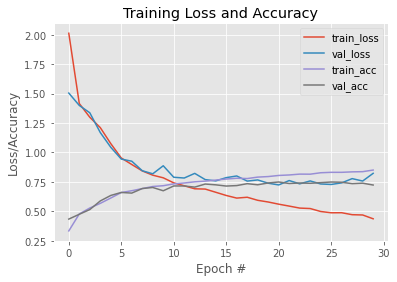

In [ ]:
print(results)
plot(History)

In [2]:
def Netwrok1(width, height, depth, classes):
  
  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

  # Densely connected layer
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  #softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def Netwrok2(width, height, depth, classes):

  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))


  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (32, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

  # Densely connected layer
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  #softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))
  
  return model

def Netwrok3(width, height, depth, classes):

  model = tf.keras.Sequential() 
  inputShape = (height, width, depth)

  model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (256, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Conv2D (32, (1, 1), padding="same", input_shape=inputShape, activation='relu'))
  model.add(tf.keras.layers.Conv2D (32, (1, 1), padding="same", input_shape=inputShape, activation='relu'))

  # Densely connected layer
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(200, activation='relu'))
  model.add(tf.keras.layers.Dense(100, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='relu'))

  #softmax layer
  model.add(tf.keras.layers.Dense(classes, activation='softmax'))

  return model

In [ ]:
model = Netwrok1(64,64, 3, 9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = model.fit(trainX,trainY,batch_size= 100, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = model.evaluate(testX, testY)
print (results)

# plot(N1)

Epoch 1/30
192/192 [==============================] - 20s 103ms/step - loss: 1.9421 - accuracy: 0.3136 - val_loss: 1.5850 - val_accuracy: 0.3954
Epoch 2/30
192/192 [==============================] - 19s 101ms/step - loss: 1.5028 - accuracy: 0.4283 - val_loss: 1.4606 - val_accuracy: 0.4360
Epoch 3/30
192/192 [==============================] - 19s 100ms/step - loss: 1.3386 - accuracy: 0.5044 - val_loss: 1.2607 - val_accuracy: 0.5444
Epoch 4/30
192/192 [==============================] - 18s 95ms/step - loss: 1.1415 - accuracy: 0.5898 - val_loss: 1.0765 - val_accuracy: 0.6100
Epoch 5/30
192/192 [==============================] - 19s 101ms/step - loss: 0.9768 - accuracy: 0.6529 - val_loss: 0.9439 - val_accuracy: 0.6708
Epoch 6/30
192/192 [==============================] - 19s 101ms/step - loss: 0.8631 - accuracy: 0.6929 - val_loss: 0.9006 - val_accuracy: 0.6817
Epoch 7/30
192/192 [==============================] - 18s 96ms/step - loss: 0.7464 - accuracy: 0.7327 - val_loss: 0.7644 - val_accu

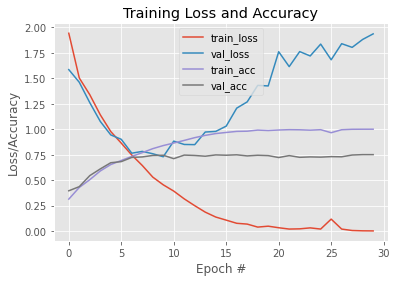

In [ ]:
plot(History)

Epoch 1/30
192/192 [==============================] - 21s 106ms/step - loss: 1.8099 - accuracy: 0.3150 - val_loss: 1.4873 - val_accuracy: 0.4235
Epoch 2/30
192/192 [==============================] - 19s 98ms/step - loss: 1.3925 - accuracy: 0.4818 - val_loss: 1.3477 - val_accuracy: 0.4948
Epoch 3/30
192/192 [==============================] - 19s 98ms/step - loss: 1.2016 - accuracy: 0.5717 - val_loss: 1.1721 - val_accuracy: 0.5733
Epoch 4/30
192/192 [==============================] - 19s 99ms/step - loss: 1.0064 - accuracy: 0.6427 - val_loss: 1.0195 - val_accuracy: 0.6377
Epoch 5/30
192/192 [==============================] - 19s 99ms/step - loss: 0.8058 - accuracy: 0.7142 - val_loss: 0.8983 - val_accuracy: 0.6806
Epoch 6/30
192/192 [==============================] - 19s 99ms/step - loss: 0.6760 - accuracy: 0.7556 - val_loss: 0.8470 - val_accuracy: 0.7023
Epoch 7/30
192/192 [==============================] - 20s 104ms/step - loss: 0.5235 - accuracy: 0.8112 - val_loss: 0.9035 - val_accurac

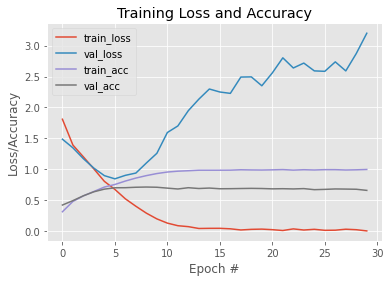

In [ ]:
model = Netwrok2(64,64, 3, 9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = model.fit(trainX,trainY,batch_size= 100, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = model.evaluate(testX, testY)
print (results)

plot(History)

Epoch 1/30
192/192 [==============================] - 88s 369ms/step - loss: 1.8409 - accuracy: 0.2589 - val_loss: 1.5844 - val_accuracy: 0.3933
Epoch 2/30
192/192 [==============================] - 71s 371ms/step - loss: 1.1695 - accuracy: 0.5647 - val_loss: 0.9005 - val_accuracy: 0.6712
Epoch 3/30
192/192 [==============================] - 67s 350ms/step - loss: 0.8042 - accuracy: 0.7005 - val_loss: 0.6921 - val_accuracy: 0.7479
Epoch 4/30
192/192 [==============================] - 68s 352ms/step - loss: 0.6488 - accuracy: 0.7618 - val_loss: 0.9418 - val_accuracy: 0.6740
Epoch 5/30
192/192 [==============================] - 68s 353ms/step - loss: 0.5446 - accuracy: 0.8002 - val_loss: 0.5986 - val_accuracy: 0.7831
Epoch 6/30
192/192 [==============================] - 68s 353ms/step - loss: 0.4524 - accuracy: 0.8370 - val_loss: 0.5229 - val_accuracy: 0.8198
Epoch 7/30
192/192 [==============================] - 72s 378ms/step - loss: 0.3793 - accuracy: 0.8642 - val_loss: 0.4717 - val_ac

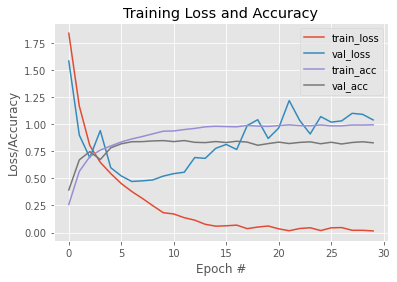

In [ ]:
model = Netwrok3(64,64, 3, 9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = model.fit(trainX,trainY,batch_size= 100, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = model.evaluate(testX, testY)
print (results)

plot(History)

Data Augmentation

In [11]:
dataAugGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                    shear_range=0.3,
                    zoom_range=0.5,
                    rotation_range=45,
                    horizontal_flip=True
                    )

augData = dataAugGenerator.flow(trainX, trainY, batch_size=100)

In [ ]:


modelDA1 = Netwrok1(64,64, 3, 9)
modelDA1.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = modelDA1.fit(augData,batch_size= 1000, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = modelDA1.evaluate(testX, testY)
print ("============Model 1 with data augmentation================")




Epoch 1/30
192/192 [==============================] - 43s 220ms/step - loss: 1.6050 - accuracy: 0.4088 - val_loss: 1.2780 - val_accuracy: 0.5150
Epoch 2/30
192/192 [==============================] - 42s 218ms/step - loss: 1.1495 - accuracy: 0.5845 - val_loss: 0.9534 - val_accuracy: 0.6621
Epoch 3/30
192/192 [==============================] - 42s 218ms/step - loss: 0.9571 - accuracy: 0.6537 - val_loss: 0.8001 - val_accuracy: 0.7167
Epoch 4/30
192/192 [==============================] - 42s 218ms/step - loss: 0.8391 - accuracy: 0.6930 - val_loss: 0.7158 - val_accuracy: 0.7283
Epoch 5/30
192/192 [==============================] - 42s 218ms/step - loss: 0.7669 - accuracy: 0.7223 - val_loss: 0.7369 - val_accuracy: 0.7248
Epoch 6/30
192/192 [==============================] - 42s 218ms/step - loss: 0.7198 - accuracy: 0.7357 - val_loss: 0.8121 - val_accuracy: 0.7033
Epoch 7/30
192/192 [==============================] - 42s 217ms/step - loss: 0.6625 - accuracy: 0.7572 - val_loss: 0.5828 - val_ac

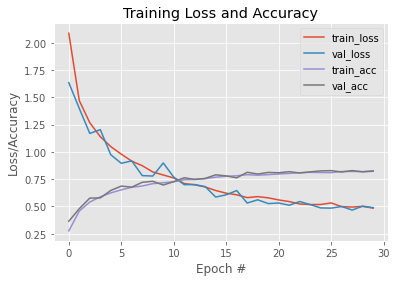

In [ ]:
plot(History)

Epoch 1/30
192/192 [==============================] - 28s 142ms/step - loss: 1.8960 - accuracy: 0.2680 - val_loss: 1.5095 - val_accuracy: 0.4187
Epoch 2/30
192/192 [==============================] - 28s 144ms/step - loss: 1.3955 - accuracy: 0.4851 - val_loss: 1.1609 - val_accuracy: 0.5852
Epoch 3/30
192/192 [==============================] - 28s 145ms/step - loss: 1.0929 - accuracy: 0.5976 - val_loss: 1.1411 - val_accuracy: 0.5827
Epoch 4/30
192/192 [==============================] - 28s 145ms/step - loss: 0.9473 - accuracy: 0.6480 - val_loss: 0.9440 - val_accuracy: 0.6402
Epoch 5/30
192/192 [==============================] - 27s 139ms/step - loss: 0.8892 - accuracy: 0.6672 - val_loss: 0.8332 - val_accuracy: 0.6910
Epoch 6/30
192/192 [==============================] - 28s 144ms/step - loss: 0.8255 - accuracy: 0.6897 - val_loss: 0.9728 - val_accuracy: 0.6535
Epoch 7/30
192/192 [==============================] - 28s 145ms/step - loss: 0.8050 - accuracy: 0.6972 - val_loss: 0.7266 - val_ac

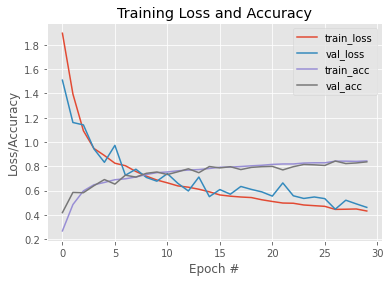

In [ ]:
modelDA2 = Netwrok2(64,64, 3, 9)
modelDA2.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = modelDA2.fit(augData,batch_size= 100, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = modelDA2.evaluate(testX, testY)
print ("============Model 2 with data augmentation================")
plot(History)

Epoch 1/30
192/192 [==============================] - 160s 730ms/step - loss: 2.0315 - accuracy: 0.1957 - val_loss: 1.8664 - val_accuracy: 0.2567
Epoch 2/30
192/192 [==============================] - 138s 721ms/step - loss: 1.7304 - accuracy: 0.2937 - val_loss: 1.5857 - val_accuracy: 0.3700
Epoch 3/30
192/192 [==============================] - 138s 718ms/step - loss: 1.4117 - accuracy: 0.4616 - val_loss: 1.2982 - val_accuracy: 0.5229
Epoch 4/30
192/192 [==============================] - 138s 719ms/step - loss: 1.0727 - accuracy: 0.6078 - val_loss: 0.8383 - val_accuracy: 0.6917
Epoch 5/30
192/192 [==============================] - 138s 718ms/step - loss: 0.8837 - accuracy: 0.6739 - val_loss: 0.8558 - val_accuracy: 0.6927
Epoch 6/30
192/192 [==============================] - 138s 719ms/step - loss: 0.7894 - accuracy: 0.7053 - val_loss: 0.9082 - val_accuracy: 0.6602
Epoch 7/30
192/192 [==============================] - 138s 717ms/step - loss: 0.7209 - accuracy: 0.7316 - val_loss: 0.8601 -

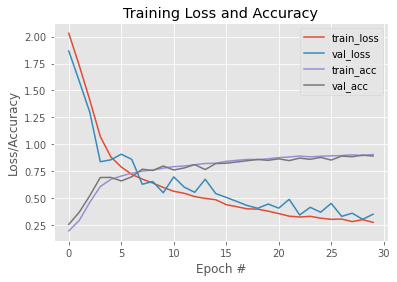

In [12]:

modelDA3 = Netwrok3(64,64, 3, 9)
modelDA3.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = modelDA3.fit(augData,batch_size= 64, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = modelDA3.evaluate(testX, testY)
print ("============Model 3 with data augmentation================")
plot(History)


Ensemble techniques

In [ ]:
import keras
def AlexNet(width, height, depth, classes):
  input_shape = (width,height,depth)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), 
                          strides=(4, 4), activation="relu", 
                          input_shape=input_shape))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D( strides= (2, 2)))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), 
                          strides=(1, 1), activation="relu", 
                          padding="same"))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(4096, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(classes, activation="softmax"))
  return model

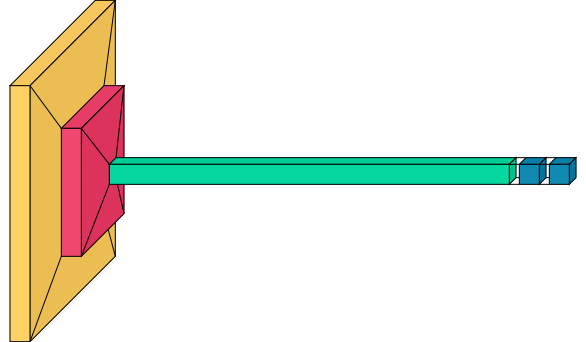

In [ ]:
alexModel = AlexNet(64,64,3,9)
visualkeras.layered_view(model)

In [ ]:
alexModel.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
History = alexModel.fit(augData,batch_size= 64, epochs = 30,verbose = 1, validation_data=(testX, testY))
results = alexModel.evaluate(testX, testY)

Epoch 1/30
192/192 [==============================] - 22s 109ms/step - loss: 1.6804 - accuracy: 0.4765 - val_loss: 11.6161 - val_accuracy: 0.1319
Epoch 2/30
192/192 [==============================] - 20s 107ms/step - loss: 1.0392 - accuracy: 0.6245 - val_loss: 12.6587 - val_accuracy: 0.1421
Epoch 3/30
192/192 [==============================] - 20s 106ms/step - loss: 0.8906 - accuracy: 0.6814 - val_loss: 1.6846 - val_accuracy: 0.4960
Epoch 4/30
192/192 [==============================] - 20s 105ms/step - loss: 0.8329 - accuracy: 0.7008 - val_loss: 1.6500 - val_accuracy: 0.5617
Epoch 5/30
192/192 [==============================] - 21s 108ms/step - loss: 0.7718 - accuracy: 0.7189 - val_loss: 5.7691 - val_accuracy: 0.2719
Epoch 6/30
192/192 [==============================] - 20s 107ms/step - loss: 0.7306 - accuracy: 0.7345 - val_loss: 1.9854 - val_accuracy: 0.4631
Epoch 7/30
192/192 [==============================] - 20s 106ms/step - loss: 0.7209 - accuracy: 0.7395 - val_loss: 2.0424 - val_

Part B VGG Implementation

In [ ]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

print (vgg16.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

CNN1 Visualization

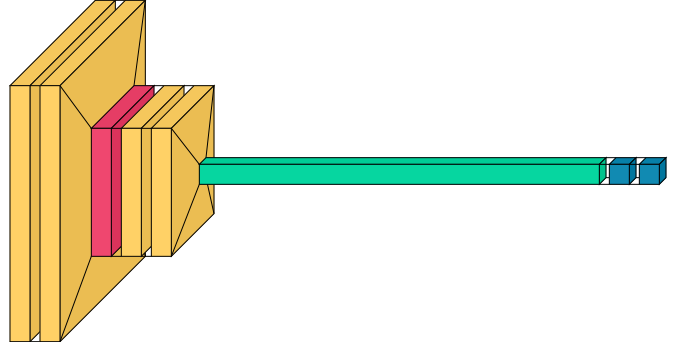

In [ ]:
m1 = Netwrok1(64,64,3,9)
m2 = Netwrok1(64,64,3,9)
m3 = Netwrok1(64,64,3,9)
visualkeras.layered_view(m1)

CNN2 Visualization

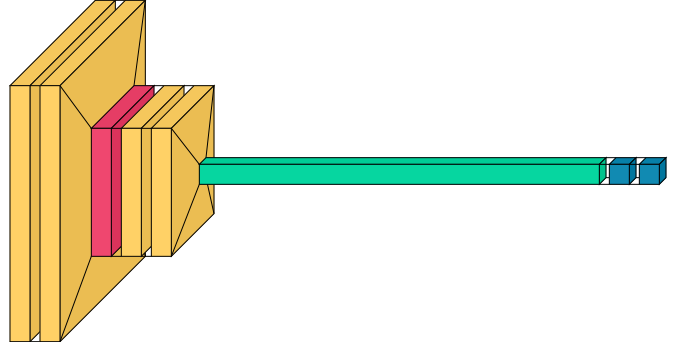

In [ ]:
visualkeras.layered_view(m2)

CNN3 Visualization

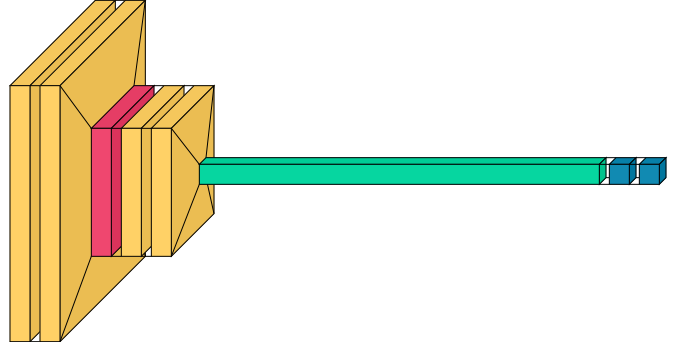

In [ ]:
visualkeras.layered_view(m3)